## Predicting Housing Prices

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
print prices.size
features = data.drop('MDEV', axis = 1)
display(data.head())
    
# Success
print "This housing dataset has {} data points with {} variables each.".format(*data.shape)

489


,RM,LSTAT,PTRATIO,MDEV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


This housing dataset has 489 data points with 4 variables each.


## Data Exploration
We will to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

As RM will increase, MDEV will increase. As LSTAT will increase, MDEV will decrease. Increase in PTRATIO will lead to a decrease in MDEV.

For a given neighborhood, price per square foot will be more or less constant. Therefore, as the number of rooms will increase in a given neighborhood, the prices of the houses will increase.

An increase LSTAT signifies a decrease in the networth of homeowners in a given neighborhood compared to the rest of the boston residents. Therefore, prices of the houses in a given neighborhood will decrease as LSTAT increases. 

PTRATIO is the number of students per teacher. A lower PTRATIO signifies a good school and a well to do neighborhood as the school is able to afford having more teachers for a given number of students. Therefore, an decrease in PTRATIO will lead to an increase in MDEV.

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


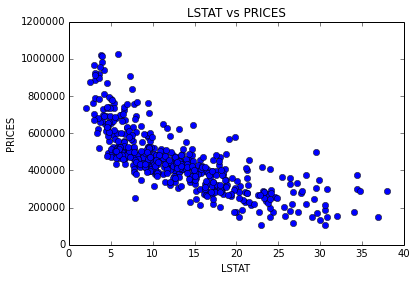

In [3]:
import matplotlib.pyplot as plt
display(features.head())
plt.plot(features.LSTAT, prices, 'o')
plt.title('LSTAT vs PRICES')
plt.xlabel('LSTAT')
plt.ylabel('PRICES')



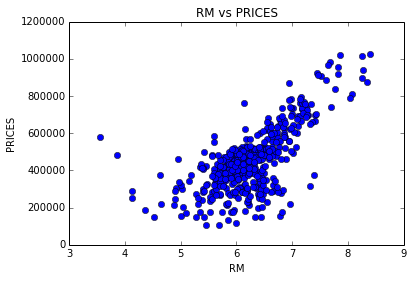

In [4]:
plt.plot(features.RM, prices, 'o')
plt.title('RM vs PRICES')
plt.xlabel('RM')
plt.ylabel('PRICES')

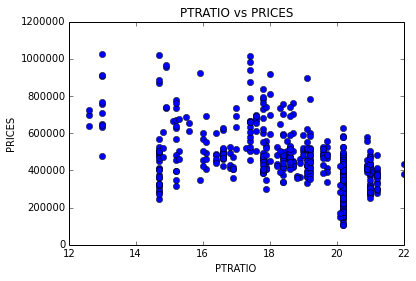

In [5]:
plt.plot(features.PTRATIO, prices, 'o')
plt.title('PTRATIO vs PRICES')
plt.xlabel('PTRATIO')
plt.ylabel('PRICES')

## Developing a Model

### Defining a Performance Metric

In [6]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### Implementation: Shuffle and Split Data

In [8]:
# Import 'train_test_split'
from sklearn import cross_validation
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = (cross_validation.train_test_split(features, prices, test_size=0.2, random_state=0))

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Benefit of splitting the data set into Training and Testing sets

Without testing our model, we would not know if the model is suffering from high bias or high variance, ie, we won't know if the model is very simple or very complex. By very simple, I mean, having fewer features than needed or having fewer nonlinear terms. By very complex or high variance, I mean having many features than needed or having many nonlinear terms in the model. Without having test data, we will go on making the model more and more complex just to decrease the training error. 

----

## Analyzing Model Performance

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


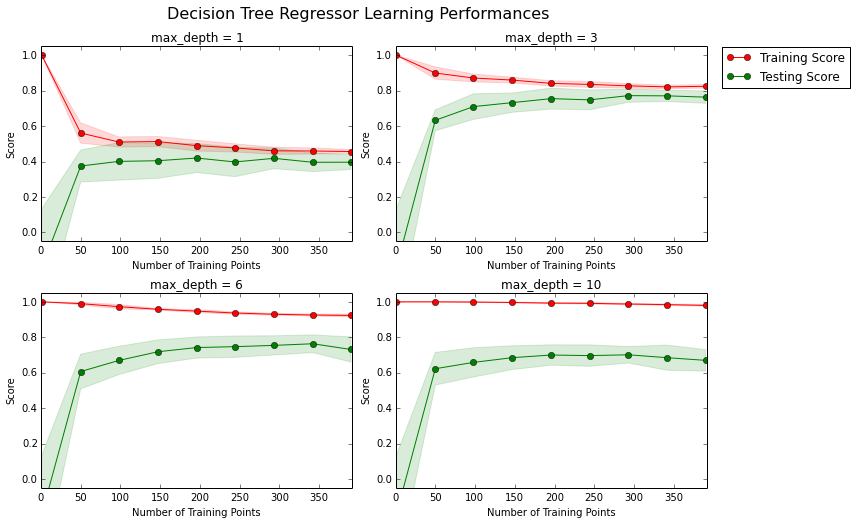

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data

As shown in the plots above, the score of the training curve decreases as more training points are added. The score of the testing curve increases as more training points are included. From the plots above it is that it won't help having more training points because both training and testing scores are already flattening out at number of training points of 250 to 300. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

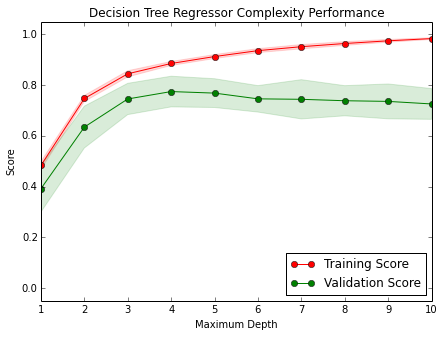

In [10]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

When the model is trained with a maxmimum depth of 1, it suffers from High bias. At maximum depth of 10, it suffers from High Variance. At maximum depth of 1, both the training score and the validation scores are small. As we increase the maximum depth, both the scores are increasing. However, as we increase the maximum depth beyond 4, the training score slowly increases whereas the validation score starts to decrease. This means that the model is overfitting the training data and decreasing the training error, however this overfitted model poorly generalizes on the validation data lowering the validation score.  

### Best-Guess Optimal Model

At maximum depth = 4, the model best generalizes to unseen data. At Max depth of 4, the validation score is the highest, ie, the generalization error in this model is the lowest.

-----

## Evaluating Model Performance

### Grid Search

We will now use grid search which is basically a parameter sweep for hyperparameter optimization. Hyperparameters are the parameters that are not optimized with the machine learning algorithms such as the penalty value (lambda) in L2 (ridge regression) and L1 (Lasso) regularization. To obtain the optimized lambda, we choose a range of lambda values (a minimum and maximum lambda) and the objective function is optimized at regular intervals in this range. By doing so, one would get training error and CV (or test) error as a function of lambda. The value of lambda at which CV error comes out to be minimum, is the winner! 


### Cross-Validation

Now will perform k-fold cross-validation, for that we divide the actual training set in k sets and each time we take one set out of these k sets as the test set and the rest of k-1 sets form the "training set". We repeat this procedure k times by taking a different subset as the test set. Benefits of the k-fold CV are that it does not reduce the training set size by taking different chunks of taining and test sets at each fold. Each data point gets to be in the test set exactly once and k-1 times in the training set. Therefore, it doesn't matter how the data gets divided.

Without having the crossvalidation set, we could run into the problem of overfitting the model. We could choose the value of hyperparameter for which training error is minimized but that hyperparameter value could correspond to the high variance in the model. Therefore we need to minimize the CV error with respect to hyperparameter. 

# Fitting a Model

In [11]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}    

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
The model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model

In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices
Let's say we have collected the following information from three of our clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
The questions are what price should we recommend each client to sell his/her home at? Do these prices seem reasonable given the values for the respective features?

In [13]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $324,240.00
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


Clients 1, 2, and 3 will be recommended to sell their houses at \$324,240.00, \$189,123.53, and \$942,666.67, respectively. By looking at the training data statistics above, the median(~\$439K) and mean (\$454,342) are very close to each other, ie, house prices are more or less normally distributed. This means house prices of 68\% of the houses lie between \$289,171 and \$619,514 and 95 percent of the houses lie between \$124,000 and \$784,685. Hence the client3's house is at the right tail of the distribution. Since the training data contains too few samples in this price range, the error bar on this predicted value will be much higher than the error bar on the client1's predicted value. The price of this house should be above average price. A model with more features than just 3 features listed above can do better for this house. The new features could be the number of bathrooms, lot size, type of flooring, etc.
Client2's predicted value will have smaller error bar than Client3 but larger error bar than Client1. The price of Client2's house would be below average price of a house.

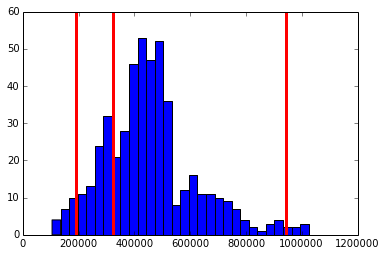

In [14]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

In [15]:
from sklearn.neighbors import NearestNeighbors
num_neighbors=5
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x )
        return indexes
    indexes = find_nearest_neighbor_indexes(x, features)
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
        neighbor_avg = np.mean(sum_prices)
    return neighbor_avg
print nearest_neighbor_price( [4, 55, 22])
index = 0  
for i in client_data:
    val=nearest_neighbor_price(i)
    index += 1
    print "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val)

280980.0
The predicted 5 nearest neighbors price for home 1 is: $315,840.00
The predicted 5 nearest neighbors price for home 2 is: $280,980.00
The predicted 5 nearest neighbors price for home 3 is: $808,920.00


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Python/2.7/site-

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. We will run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [16]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Applicability
We will now answer some questions that may arise:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

-- How relevant today is data that was collected from 1978?
If the distribution of the prices today is the same as from 1978 and that the mean value of the distribution has shifted towards right then the data from 1978 is relevant in today's market.

--Are the features present in the data sufficient to describe a home?
The variability in the price for Client1's house from 10 different test-train models is ~$118K. The average value of this distributions is ~$355K, ie, there is 33\% error bar or the variability in the price of an average house. This means that the accuracy of prediction is around 67\%. From the Figure (Decision Tree Regressor complexity performance) above, the R2 score for max_depth of 4 is around 75\%. To improve this accuracy, we need more features in the training data.

--Is the model robust enough to make consistent predictions?
As discussed above, the variability in the price of an average house is 33\%, ie, the model is not consistent enough. 

--Would data collected in an urban city like Boston be applicable in a rural city?
The data collected in an urban city will not be applicable in a rural city because of socioeconomic factors.